In [21]:
import matplotlib.pyplot as plt
import numpy
!pip install nltk
from nltk.corpus import stopwords
import re
import pandas as pd
df = pd.read_csv('userStories/Book2.csv')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

Defaulting to user installation because normal site-packages is not writeable


In [22]:
df.head()

,attribute,user,music,employee,book
0,feedbacks,1,0,0,0
1,contributions,1,0,0,0
2,timezone,1,0,0,0
3,interests,1,0,0,0
4,location,1,0,0,0


In [23]:
len(df.value_counts())

78

In [24]:
df["class"].unique()

KeyError: 'class'

# Checking for NULLs and removing them

In [5]:
df.isnull().sum()

attribute    0
class        0
dtype: int64

# Dropping duplicates

In [6]:
df.shape

(34, 2)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(33, 2)

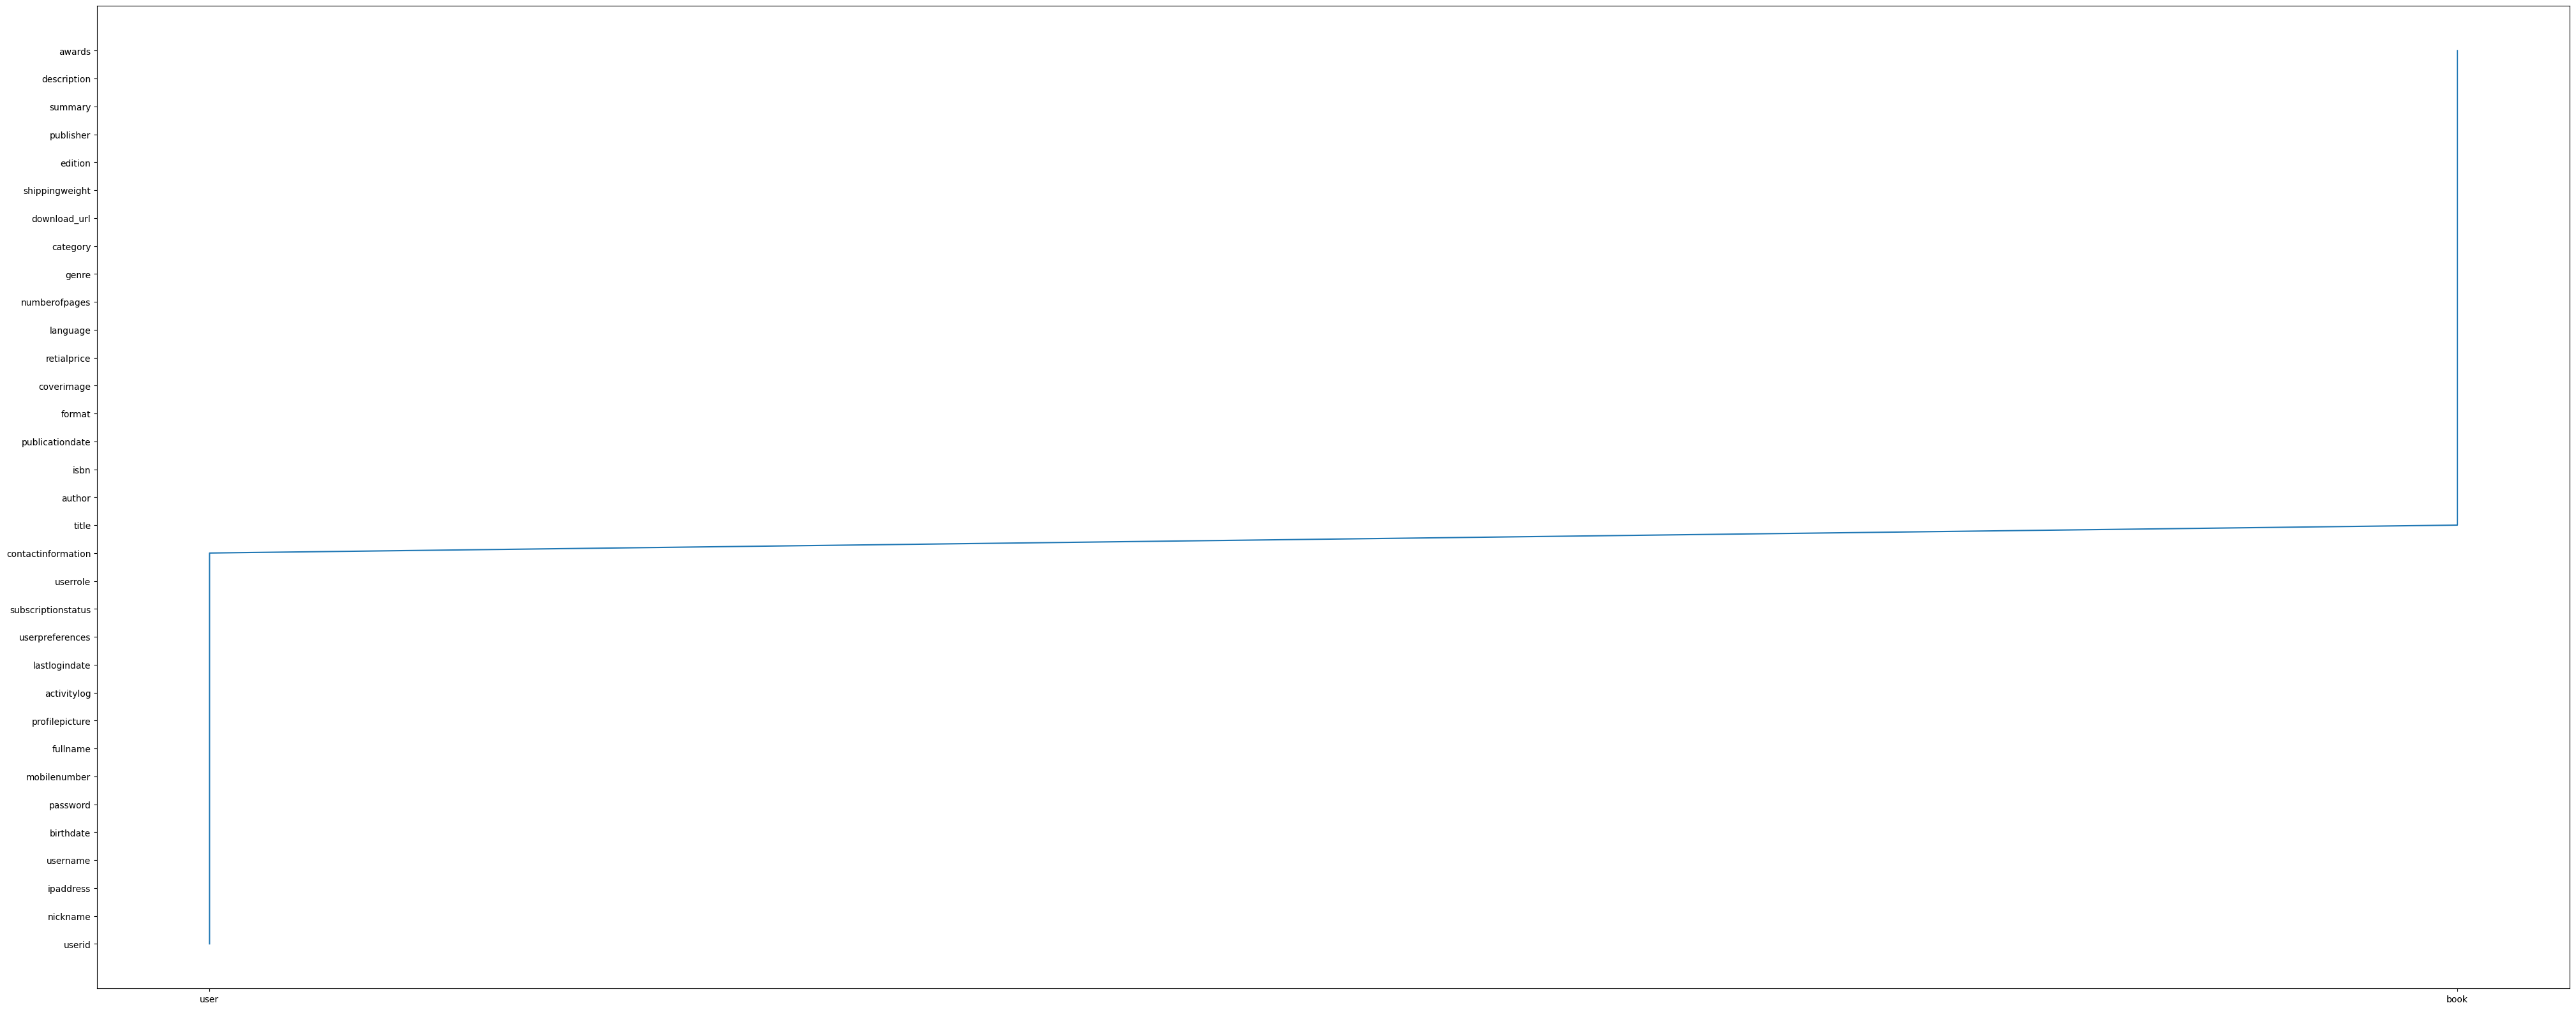

In [8]:

import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(df["class"],df["attribute"])

# Preprocessing the text

In [9]:
print(df['attribute'].apply(lambda x: len(x.split(' '))).sum())

33


In [10]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [11]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df['attribute'] = df['attribute'].apply(clean_text)

In [12]:
print(df['attribute'])

0                 userid
1               nickname
2              ipaddress
3               username
4              birthdate
5               password
6           mobilenumber
7               fullname
8         profilepicture
9            activitylog
10         lastlogindate
11       userpreferences
12    subscriptionstatus
13              userrole
14    contactinformation
15                 title
16                author
17                  isbn
18       publicationdate
19                format
20            coverimage
21           retialprice
22              language
23         numberofpages
24                 genre
25              category
26          download_url
27        shippingweight
28               edition
29             publisher
31               summary
32           description
33                awards
Name: attribute, dtype: object


# Train Test split

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X = df['attribute'].apply(clean_text)

X=X=df.drop(['class'],axis=1)

X

,attribute
0,userid
1,nickname
2,ipaddress
3,username
4,birthdate
5,password
6,mobilenumber
7,fullname
8,profilepicture
9,activitylog


In [14]:
y=df["class"]
y

0     user
1     user
2     user
3     user
4     user
5     user
6     user
7     user
8     user
9     user
10    user
11    user
12    user
13    user
14    user
15    book
16    book
17    book
18    book
19    book
20    book
21    book
22    book
23    book
24    book
25    book
26    book
27    book
28    book
29    book
31    book
32    book
33    book
Name: class, dtype: object

In [15]:



X_train, X_test, y_train, y_test = train_test_split(X.attribute, y, test_size=0.25,shuffle=False,random_state=70)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24,), (9,), (24,), (9,))

# Applying Logistic Regression

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
lr = make_pipeline( CountVectorizer(ngram_range=(1,2)),TfidfTransformer(),MultinomialNB())

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
print(classification_report(y_test,y_pred1))

print(f"Accuracy is : {lr.score(X_train,y_train)}")
print(f"Accuracy is : {lr.score(X_test,y_test)}")
# Perform cross-validation
scores = cross_val_score(lr, X, y, cv=5)  # Specify the number of folds (e.g., 5-fold cross-validation)

# Print the cross-validated scores
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())
# for i,x in enumerate(X_test):
#      print("attribute " , x,"                    class preditected:" , y_pred1[i])
#


              precision    recall  f1-score   support

        book       0.00      0.00      0.00       9.0
        user       0.00      0.00      0.00       0.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0

Accuracy is : 1.0
Accuracy is : 0.0
Cross-validated scores: [nan nan nan nan nan]
Mean accuracy: nan
Standard deviation: nan


Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [20]:
from sklearn.multioutput import MultiOutputClassifier

X=df.drop(['class'],axis=1)
y=df.drop(['attribute'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.attribute, y, test_size=0.30,shuffle=False,random_state=42)


pip=Pipeline(steps=[('cv',CountVectorizer()),('lr_multi',MultiOutputClassifier(LogisticRegression()))])
predict=pip.fit(X_train,y_train)


print(pip.score(X_train,y_train))
print(pip.score(X_test,y_test))


X_test.iloc[0]
print("actual preditiction :" , y_test.iloc[0])
ex=X_test.iloc[0]
print("resulted preditiction :" , pip.predict([ex]))




0.6521739130434783
0.0
actual preditiction : class    book
Name: 23, dtype: object
resulted preditiction : [['user']]


# Applying Naive Bayes Classifier

In [221]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

naivebayes.fit(X_train, y_train)
y_pred1 = naivebayes.predict(X_test)
score=naivebayes.score(X_test,y_test)

print(f"Accuracy is : {score}")
for i,x in enumerate(X_test):
    print("attribute " , x,"                    class " , y_pred1[i])

Accuracy is : 0.0
attribute  enginesize                     class  customer
attribute  transmission                     class  customer
attribute  fueltype                     class  customer
attribute  numberofdoors                     class  customer
attribute  price                     class  customer
attribute  seatingcapacity                     class  customer
attribute  vin                     class  customer
attribute  topspeed                     class  customer
attribute  horsepower                     class  customer
attribute  safetyfeatures                     class  customer
attribute  weight                     class  customer
attribute  brakingdistance                     class  customer
attribute  tyres                     class  customer
attribute  entertainmentsystem                     class  customer
attribute  suspensiontype                     class  customer
attribute  steeringtype                     class  customer
attribute  emissions                     clas

Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# GaussianNB


In [50]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

In [112]:

tfidf=TfidfVectorizer(analyzer="word",max_features=5000)
corpus = df['attribute']
Xfeatures1 = tfidf.fit_transform(corpus)
Xfeatures1.todense

<bound method spmatrix.todense of <231x213 sparse matrix of type '<class 'numpy.float64'>'
	with 231 stored elements in Compressed Sparse Row format>>

In [113]:

X_train, X_test, y_train, y_test = train_test_split(Xfeatures1.toarray(), y, test_size=0.25, random_state =100,shuffle=True)

In [114]:
# Build a Gaussian Classifier
from sklearn.metrics import precision_score,f1_score

model=  GaussianNB()

# Model training

model.fit(X_train,y_train)
# Predict Output
y_predit=model.predict(X_test)
f1_score(y_test,y_predit)
print(f'accuracy {accuracy_score(y_predit,y_test)}')
print(f'f1score {f1_score(y_test,y_predit)}')


NameError: name 'GaussianNB' is not defined

In [82]:
d = {'col2': y_predit, 'col3': y_test}
df = pd.DataFrame(data=d)
df

NameError: name 'y_predit' is not defined

# Applying Xgboost Classifier

In [115]:
df = pd.read_csv('userStories/Book1.csv')
possible_labels = df["class"]
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

df['label'] = df["class"].replace(label_dict)

In [116]:

X_train, X_test, y_train, y_test = train_test_split(Xfeatures1.toarray(),df["label"] , test_size=0.25, random_state =1,shuffle=True)

ValueError: Found input variables with inconsistent numbers of samples: [231, 234]

In [57]:
!pip install xgboost
from xgboost import XGBClassifier

xgboost = XGBClassifier()

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')


Defaulting to user installation because normal site-packages is not writeable


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11], got ['book' 'car' 'creditcard' 'customer' 'employee' 'exam' 'music' 'patient'
 'shoppingcart' 'student' 'user' 'website']

# Applying BERT

In [58]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer

In [59]:
from transformers import BertForSequenceClassification

In [60]:
from torch.utils.data import TensorDataset

In [61]:
possible_labels = df["class"].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'user': 0,
 'book': 1,
 'music': 2,
 'employee': 3,
 'customer': 4,
 'website': 5,
 'car': 6,
 'creditcard': 7,
 'student': 8,
 'exam': 9,
 'shoppingcart': 10,
 'patient': 11}

In [62]:
df['label'] = df["class"].replace(label_dict)
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
229    11
230    11
231    11
232    11
233    11
Name: label, Length: 234, dtype: int64

In [63]:
df.head()

,attribute,class,label
0,feedbacks,user,0
1,contributions,user,0
2,timezone,user,0
3,interests,user,0
4,location,user,0


In [64]:
X_train, X_val, y_train, y_val = train_test_split(df["attribute"],
                                                  df["class"],
                                                  test_size=0.50,
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['class', 'attribute', 'data_type']).count()

KeyError: "None of [Index(['opinion', 'terminationdate', 'releasedate', 'interestrate', 'name',\n       'safetyfeatures', 'licensinginformation', 'fullname', 'color',\n       'last_name',\n       ...\n       'brakingdistance', 'customerid', 'genre', 'contributions',\n       'campus_involvement', 'transmission', 'products', 'numberofdoors',\n       'fanfeedback', 'compensation'],\n      dtype='object', length=117)] are in the [index]"

In [65]:
df.head()

,attribute,class,label,data_type
0,feedbacks,user,0,not_set
1,contributions,user,0,not_set
2,timezone,user,0,not_set
3,interests,user,0,not_set
4,location,user,0,not_set


In [66]:
df.head()

,attribute,class,label,data_type
0,feedbacks,user,0,not_set
1,contributions,user,0,not_set
2,timezone,user,0,not_set
3,interests,user,0,not_set
4,location,user,0,not_set


In [67]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [68]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].attribute.values,
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Z:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


ValueError: You should supply an encoding or a list of encodings to this method that includes input_ids, but you provided []

In [568]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

NameError: name 'encoded_data_train' is not defined

In [569]:
encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].attribute.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


NameError: name 'tokenizer' is not defined

In [570]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

NameError: name 'BertForSequenceClassification' is not defined

In [571]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

NameError: name 'dataset_train' is not defined

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [572]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

NameError: name 'torch' is not defined